In [1]:
import sys
import os

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join("../scripts"))) 
import data_loader      

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

import pandas as pd

import dvc.api
import io

import datetime

from logger_class import App_Logger
# app_logger = App_Logger("../logs/dataLoading.log").get_app_logger()

In [2]:
path = 'data/nb.csv'
repo = './'
version='nb_V1'

data_url = dvc.api.get_url(
    path=path,
	repo=repo,
	rev=version
	)

tripdf = pd.read_csv(data_url)

In [3]:
def todatetime(df, column):
        df[column] = pd.to_datetime(df[column])
        return df

cols = ['Trip Start Time', 'Trip End Time']

for i in cols:
    todatetime(tripdf, i)

In [4]:
tripdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Trip ID           536020 non-null  int64         
 1   Trip Origin       536020 non-null  object        
 2   Trip Destination  536020 non-null  object        
 3   Trip Start Time   534369 non-null  datetime64[ns]
 4   Trip End Time     536019 non-null  datetime64[ns]
 5   Trip_Org_lat      536020 non-null  float64       
 6   Trip_Org_long     536020 non-null  float64       
 7   Trip_Dest_lat     536020 non-null  float64       
 8   Trip_Dest_long    536020 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 36.8+ MB


In [5]:
data_loader.percent_missing(tripdf)

The dataset contains 0.03 % missing values.


In [6]:
data_loader.missing_values_table(tripdf)

Your selected dataframe has 9 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Trip Start Time,1651,0.3,datetime64[ns]
Trip End Time,1,0.0,datetime64[ns]


Trip Start Time has missing 1651 missing values and Trip End time as 1 missing value.

Let's consider the duration of the trips to find deal with that.

In [7]:
tripdf['duration'] = tripdf['Trip End Time'] - tripdf['Trip Start Time']

In [8]:
duration_min = []
for i in range(len(tripdf)):
    duration_min.append(tripdf['duration'][i].seconds / 60)

tripdf['duration_in_min'] = duration_min

In [11]:
data_loader.missing_values_table(tripdf)

Your selected dataframe has 11 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values,Dtype
duration,1652,0.3,timedelta64[ns]
duration_in_min,1652,0.3,float64
Trip Start Time,1651,0.3,datetime64[ns]
Trip End Time,1,0.0,datetime64[ns]


In [12]:
## Fill missing values in duration
tripdf.duration_in_min.skew()

7.563747941895052

In [13]:
## Fill missing values with median
tripdf['duration_in_min'] = tripdf['duration_in_min'].fillna(tripdf['duration_in_min'].median())

Text(0.5, 1.0, 'The distribution of Trip Duration in minutes')

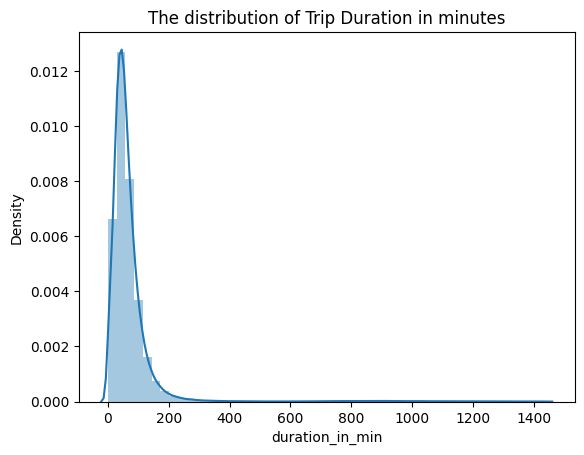

In [15]:
sns.distplot(tripdf['duration_in_min'],kde=True)
plt.title('The distribution of Trip Duration in minutes')

### Locations

In [27]:
Julydf = tripdf[tripdf['Trip Start Time'].dt.month == 7.0]

In [29]:
len(Julydf)

83689

In [67]:
def getlocation(Latitude: str, Longitude: str):
    location = geolocator.reverse(Latitude+","+Longitude).raw['address']
    return location

In [49]:
Latitude = f"{Julydf['Trip_Org_lat'][0]}"
Longitude = f"{Julydf['Trip_Org_long'][0]}"
 
location = geolocator.reverse(Latitude+","+Longitude)
 
# Display
print(location)

address = location.raw['address']
print(address)

city = address.get('city', '')
state = address.get('state', '')
country = address.get('country', '')
code = address.get('country_code')
zipcode = address.get('postcode')
print('City : ',city)
print('State : ',state)
print('Country : ',country)
print('Zip Code : ', zipcode)

Little Road, Onike, Lagos Mainland, Lagos, 100231, Nigeria
{'road': 'Little Road', 'village': 'Onike', 'county': 'Lagos Mainland', 'state': 'Lagos', 'ISO3166-2-lvl4': 'NG-LA', 'postcode': '100231', 'country': 'Nigeria', 'country_code': 'ng'}
City :  
State :  Lagos
Country :  Nigeria
Zip Code :  100231


In [64]:
getlocation(f"{Julydf['Trip_Org_lat'][0]}", f"{Julydf['Trip_Org_long'][0]}").

{'road': 'Little Road',
 'village': 'Onike',
 'county': 'Lagos Mainland',
 'state': 'Lagos',
 'ISO3166-2-lvl4': 'NG-LA',
 'postcode': '100231',
 'country': 'Nigeria',
 'country_code': 'ng'}

<Figure size 640x480 with 0 Axes>

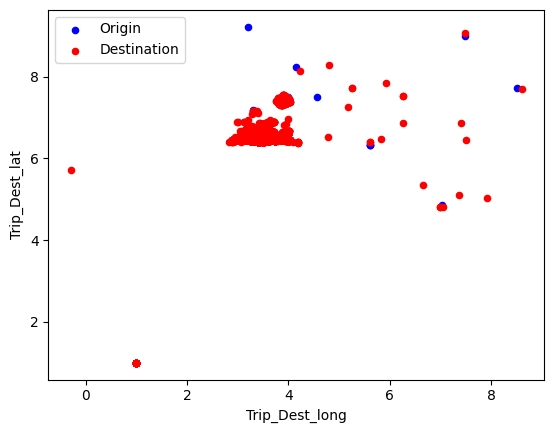

In [77]:
plt.figure()
ax = tripdf.plot(kind="scatter", x='Trip_Org_long', y='Trip_Org_lat', color='blue', label='Origin', cmap=plt.get_cmap("jet"))
tripdf.plot(kind="scatter", x='Trip_Dest_long', y='Trip_Dest_lat', color='red', label='Destination', ax=ax, cmap=plt.get_cmap("jet"))
plt.legend()

In [78]:
# Trip_Org_city = []

# for i in range(len(Julydf)):
#     city = getlocation(str(Julydf['Trip_Org_lat'][i]), str(Julydf['Trip_Org_long'][i]))
#     Trip_Org_city.append(city)
    